In [3]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset in Google Drive
data_dir = '/content/drive/My Drive/asl-alphabet-train'  # Adjust the path as necessary

Mounted at /content/drive


In [5]:
# Categories of gestures (A-Z)
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
num_classes = len(categories)

# Print categories to debug
print("Categories:", categories)
print("Number of categories:", num_classes)

Categories: ['X', 'S', 'Z', 'Y', 'V', 'T', 'W', 'R', 'space', 'U', 'J', 'P', 'O', 'M', 'K', 'I', 'L', 'Q', 'nothing', 'N', 'A', 'D', 'F', 'del', 'E', 'H', 'G', 'C', 'B']
Number of categories: 29


In [7]:
# Load and preprocess data
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    print(f"Processing category: {category} (Class number: {class_num})")
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)
            if os.path.isfile(img_path):  # Ensure it's a file
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (64, 64))  # Resize images to 64x64
                data.append(resized_array)
                labels.append(class_num)
            else:
                print(f"Skipping non-file item: {img_path}")
        except Exception as e:
            print(f"Error loading image {img}: {e}")

Processing category: X (Class number: 0)
Processing category: S (Class number: 1)
Processing category: Z (Class number: 2)
Processing category: Y (Class number: 3)
Processing category: V (Class number: 4)
Processing category: T (Class number: 5)
Processing category: W (Class number: 6)
Processing category: R (Class number: 7)
Processing category: space (Class number: 8)
Processing category: U (Class number: 9)
Processing category: J (Class number: 10)
Processing category: P (Class number: 11)
Processing category: O (Class number: 12)
Processing category: M (Class number: 13)
Processing category: K (Class number: 14)
Processing category: I (Class number: 15)
Processing category: L (Class number: 16)
Processing category: Q (Class number: 17)
Processing category: nothing (Class number: 18)
Processing category: N (Class number: 19)
Processing category: A (Class number: 20)
Processing category: D (Class number: 21)
Processing category: F (Class number: 22)
Processing category: del (Class nu

In [9]:
# Convert data and labels to numpy arrays
data = np.array(data).reshape(-1, 64, 64, 1)
data = data / 255.0  # Normalize pixel values
labels = np.array(labels)

In [10]:
# Print dataset size to debug
print("Total images loaded:", len(data))
print("Total labels loaded:", len(labels))



Total images loaded: 195
Total labels loaded: 195


In [11]:
# Check if data is not empty
if len(data) == 0 or len(labels) == 0:
    raise ValueError("No images were loaded. Check the dataset path and image loading logic.")


In [12]:
# Split data into training (70%), validation (15%), and test sets (15%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [13]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)


In [14]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [15]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
5/5 [==============================] - 4s 214ms/step - loss: 3.3357 - accuracy: 0.1397 - val_loss: 3.1487 - val_accuracy: 0.1724
Epoch 2/10
5/5 [==============================] - 1s 142ms/step - loss: 3.0143 - accuracy: 0.1471 - val_loss: 2.4299 - val_accuracy: 0.1724
Epoch 3/10
5/5 [==============================] - 1s 143ms/step - loss: 2.5713 - accuracy: 0.1838 - val_loss: 2.0583 - val_accuracy: 0.1724
Epoch 4/10
5/5 [==============================] - 1s 137ms/step - loss: 2.4690 - accuracy: 0.1471 - val_loss: 2.0871 - val_accuracy: 0.1724
Epoch 5/10
5/5 [==============================] - 1s 138ms/step - loss: 2.3029 - accuracy: 0.1765 - val_loss: 2.1668 - val_accuracy: 0.1379
Epoch 6/10
5/5 [==============================] - 1s 141ms/step - loss: 2.3665 - accuracy: 0.1471 - val_loss: 2.1661 - val_accuracy: 0.1724
Epoch 7/10
5/5 [==============================] - 1s 132ms/step - loss: 2.3461 - accuracy: 0.0809 - val_loss: 2.0541 - val_accuracy: 0.1724
Epoch 8/10
5/5 [====

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


1/1 [==============================] - 0s 58ms/step - loss: 2.1238 - accuracy: 0.1333
Test accuracy: 13.33%


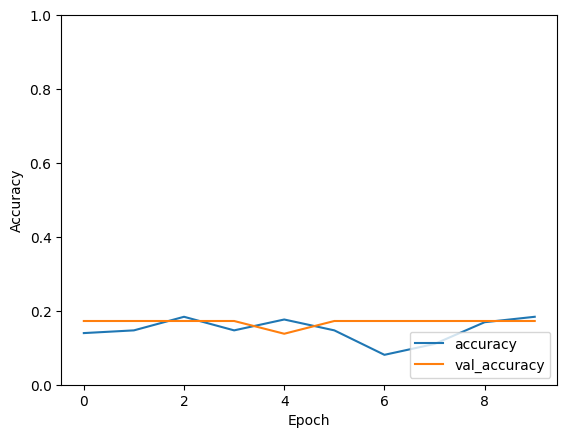

In [18]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

1/1 [==============================] - 0s 63ms/step - loss: 2.1238 - accuracy: 0.1333
Test accuracy: 13.33%


1/1 [==============================] - 0s 293ms/step


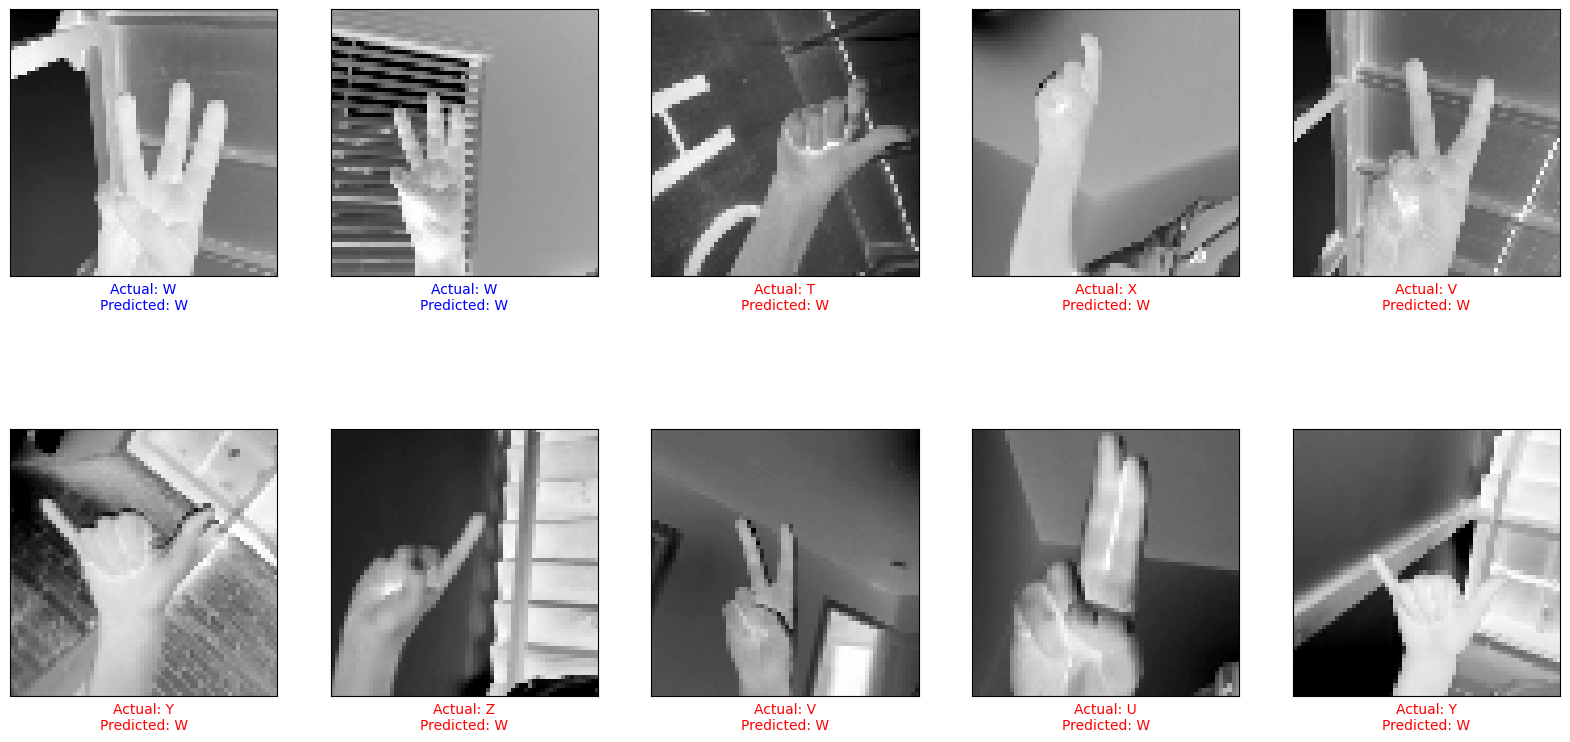

In [20]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Function to plot the results
def plot_predictions(images, labels, predictions, categories, num=10):
    plt.figure(figsize=(20, 10))
    for i in range(num):
        plt.subplot(2, num // 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(64, 64), cmap=plt.cm.binary)
        true_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])
        color = 'blue' if true_label == predicted_label else 'red'
        plt.xlabel(f"Actual: {categories[true_label]}\nPredicted: {categories[predicted_label]}", color=color)
    plt.show()

# Plot predictions for the first 10 images in the test set
plot_predictions(X_test, y_test, predictions, categories, num=10)